# LAB 9: COLOR IMAGE PROCESSING

In this experiment, a color image (house.jpg) is processed using different color models. The RGB image is first split into individual color channels. The image is then converted into HSV, YCbCr, and LAB color spaces to analyze color information in different representations. White balance correction is applied to improve color consistency. Color masking is performed to extract a specific color from the image. Finally, segmentation results obtained using RGB, HSV, and LAB color spaces are compared to determine which color model provides better segmentation performance.

(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

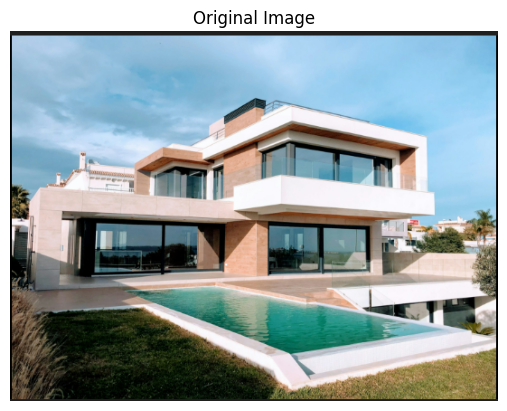

In [2]:
# Import Libraries & Load Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (BGR format by default in OpenCV)
img = cv2.imread('house.png')

# Convert BGR to RGB for correct display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')


(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

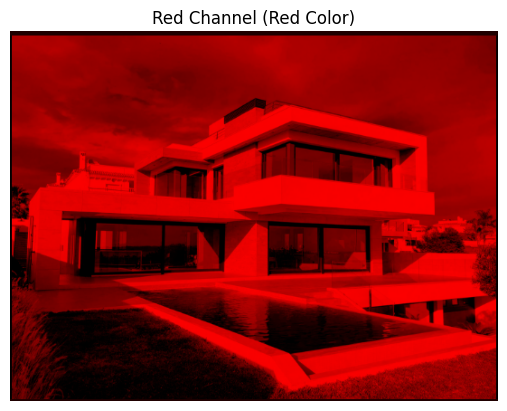

In [6]:
red_img = np.zeros_like(img_rgb)
red_img[:,:,0] = R

plt.imshow(red_img)
plt.title("Red Channel (Red Color)")
plt.axis('off')





(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

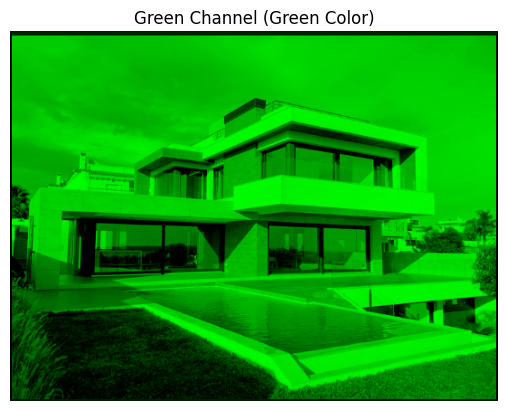

In [7]:
green_img = np.zeros_like(img_rgb)
green_img[:,:,1] = G

plt.imshow(green_img)
plt.title("Green Channel (Green Color)")
plt.axis('off')

(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

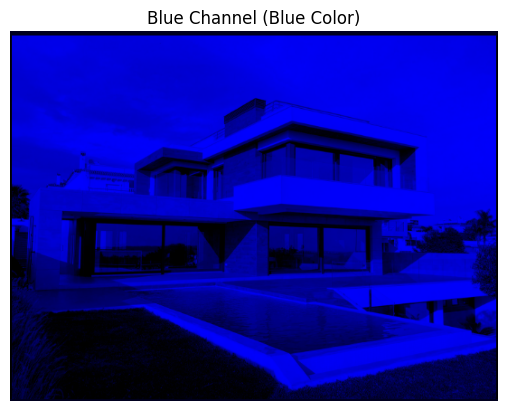

In [8]:
blue_img = np.zeros_like(img_rgb)
blue_img[:,:,2] = B

plt.imshow(blue_img)
plt.title("Blue Channel (Blue Color)")
plt.axis('off')


(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

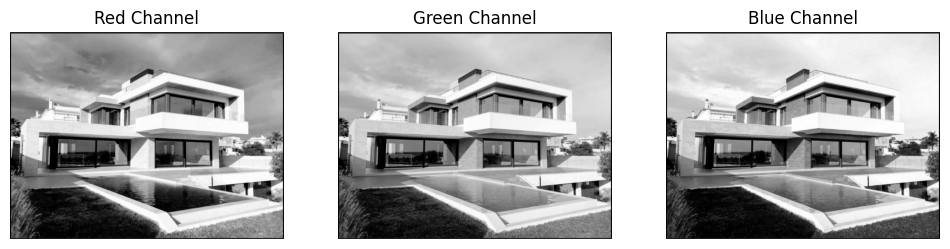

In [9]:
# Task 1: Extract R, G, B Channels
# Split channels
R, G, B = cv2.split(img_rgb)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')

In [10]:
# Task 2: Convert RGB → HSV, YCbCr, Lab
# Convert color spaces
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_ycbcr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

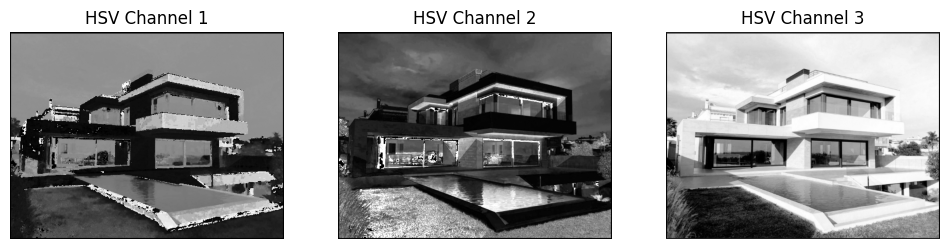

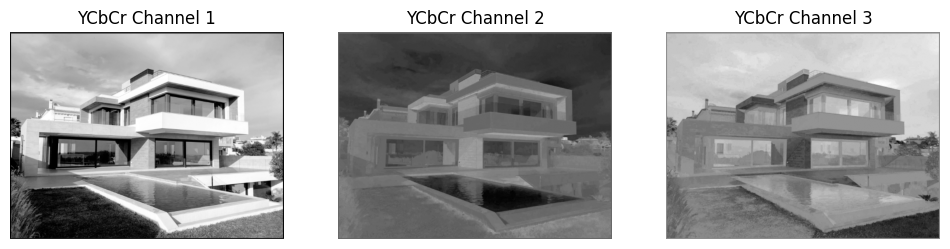

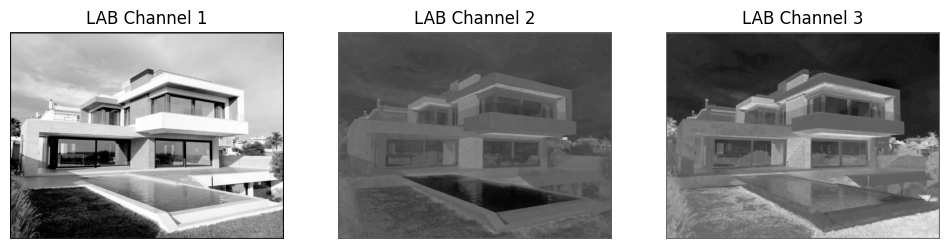

In [11]:
# Display Channels
def show_channels(image, title):
    ch = cv2.split(image)
    plt.figure(figsize=(12,4))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(ch[i], cmap='gray')
        plt.title(f"{title} Channel {i+1}")
        plt.axis('off')
    plt.show()

show_channels(img_hsv, "HSV")
show_channels(img_ycbcr, "YCbCr")
show_channels(img_lab, "LAB")

(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

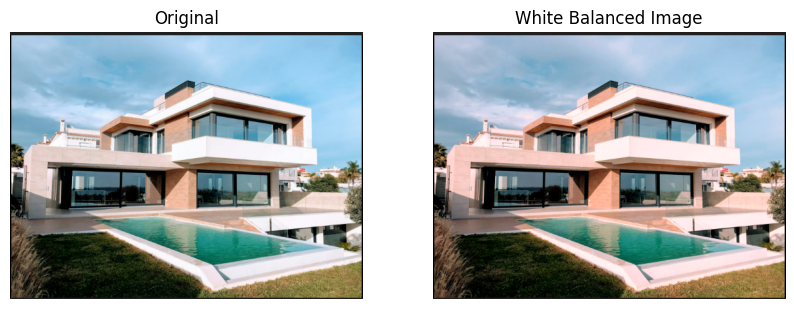

In [12]:
# Task 3: White Balance Correction (Gray World Algorithm)
# Convert to float
wb_img = img_rgb.astype(np.float32)

# Compute mean of each channel
avgR = np.mean(wb_img[:,:,0])
avgG = np.mean(wb_img[:,:,1])
avgB = np.mean(wb_img[:,:,2])

# Gray world assumption
avgGray = (avgR + avgG + avgB) / 3

wb_img[:,:,0] *= (avgGray / avgR)
wb_img[:,:,1] *= (avgGray / avgG)
wb_img[:,:,2] *= (avgGray / avgB)

# Clip values
wb_img = np.clip(wb_img, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wb_img)
plt.title("White Balanced Image")
plt.axis('off')

(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

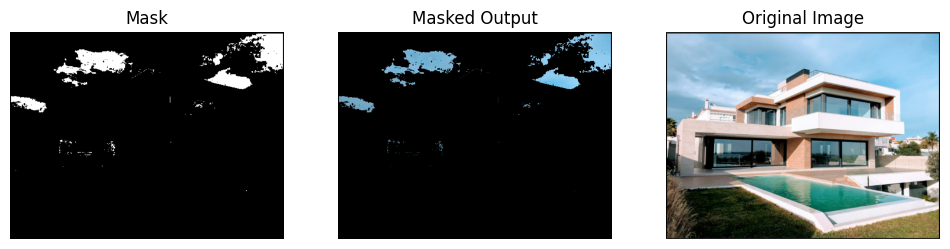

In [13]:
# Task 4: Color Masking (Example: Blue Color)
# Using HSV Color Space
# Define blue color range in HSV
lower_blue = np.array([100, 100, 50])
upper_blue = np.array([140, 255, 255])

# Create mask
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

# Apply mask
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(result)
plt.title("Masked Output")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

In [14]:
# Task 5: Compare Segmentation Strength of Color Spaces
# Segment Blue Color in RGB, HSV, LAB
# RGB segmentation
lower_rgb = np.array([0, 0, 100])
upper_rgb = np.array([120, 120, 255])
mask_rgb = cv2.inRange(img_rgb, lower_rgb, upper_rgb)
seg_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_rgb)

# HSV segmentation (better)
mask_hsv = cv2.inRange(img_hsv, lower_blue, upper_blue)
seg_hsv = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_hsv)

# LAB segmentation
L, A, B = cv2.split(img_lab)
mask_lab = cv2.inRange(B, 140, 200)
seg_lab = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_lab)

(np.float64(-0.5), np.float64(539.5), np.float64(408.5), np.float64(-0.5))

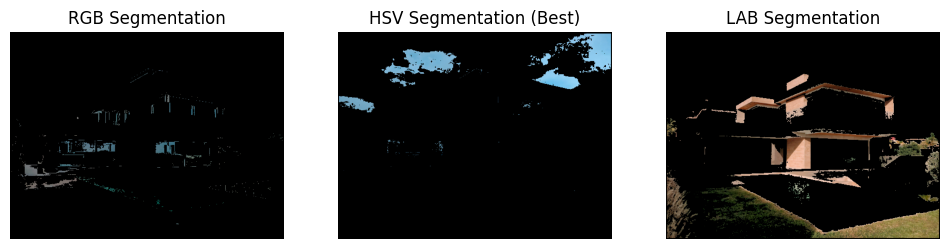

In [15]:
# Display Comparison
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(seg_rgb)
plt.title("RGB Segmentation")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(seg_hsv)
plt.title("HSV Segmentation (Best)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(seg_lab)
plt.title("LAB Segmentation")
plt.axis('off')